In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel(r"E:\Australia_GDP_Cleaning\Commodities\AGRICULTURE_COMMODOTIES.xlsx", sheet_name='Sheet1', parse_dates=['Date'], index_col='Date')
df.columns = ['Cattle', 'Cotton', 'Sugar', 'Coal', 'Wheat']

In [16]:
df['Cattle'] = df['Cattle'].fillna(method='ffill')
df['Cotton'] = df['Cotton'].fillna(method='ffill')
df['Sugar'] = df['Sugar'].fillna(method='ffill')
df['Wheat'] = df['Wheat'].fillna(method='ffill')

In [17]:
df

,Cattle,Cotton,Sugar,Coal,Wheat
Date,,,,,
2000-01-03,1.033592,0.738258,0.094239,NaN,3.457972
2000-01-04,1.038485,0.736561,0.089188,NaN,3.474343
2000-01-05,1.032964,0.732645,0.089017,NaN,3.486252
2000-01-06,1.048042,0.758568,0.090575,NaN,3.480722
2000-01-07,1.046121,0.785889,0.089340,NaN,3.504887
...,...,...,...,...,...
2025-02-21,3.131393,1.028167,0.335327,160.503541,9.402046
2025-02-24,3.134846,1.037807,0.331443,161.074354,9.239130
2025-02-25,3.137317,1.030585,0.337064,160.807189,9.124231


In [18]:
print("Missing values in Coal:", df['Coal'].isnull().sum())

corr = df.corr()
print("\nCorrelation Matrix:\n", corr['Coal'].sort_values(ascending=False))

Missing values in Coal: 2271

Correlation Matrix:
 Coal      1.000000
Wheat     0.760413
Cotton    0.691120
Cattle    0.439370
Sugar     0.403496
Name: Coal, dtype: float64


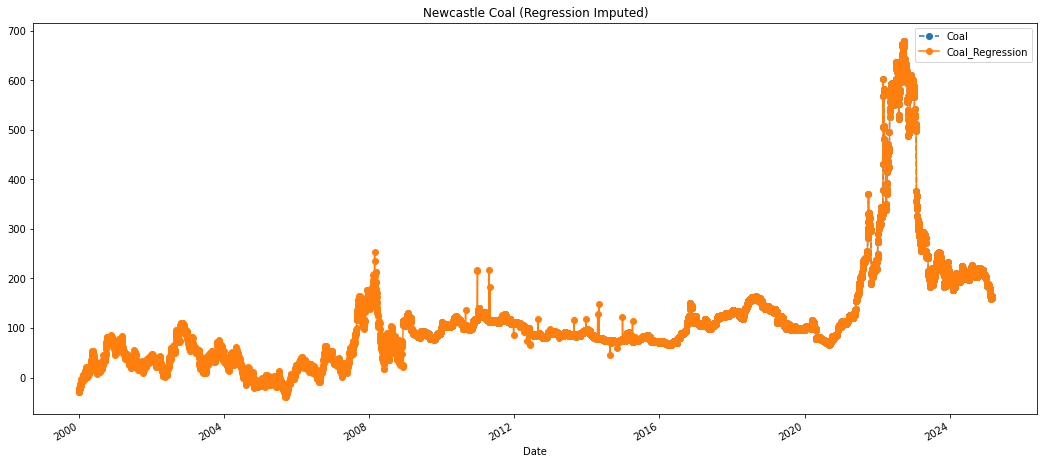

In [27]:
# Split data into known and unknown Coal values
known = df.dropna(subset=['Coal'])
unknown = df[df['Coal'].isnull()]

# Features: Cattle, Cotton, Sugar, Wheat
features = ['Cattle', 'Cotton', 'Sugar', 'Wheat']
X_train = known[features]
y_train = known['Coal']

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing Coal values
X_pred = unknown[features]
predicted_coal = model.predict(X_pred)

# Fill missing values
df['Coal_Regression'] = df['Coal'].copy()
df.loc[df['Coal'].isnull(), 'Coal_Regression'] = predicted_coal

plt.figure(figsize=(18, 8))
df['Coal'].plot(title='Newcastle Coal (Original)', marker='o', linestyle='--')
df['Coal_Regression'].plot(title='Newcastle Coal (Regression Imputed)', marker='o')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

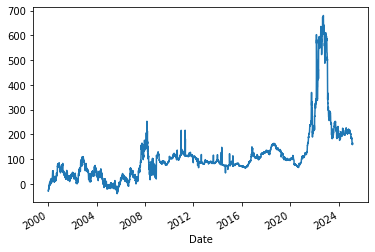

In [49]:
df['Coal_Regression'].plot()

<Axes: xlabel='Date'>

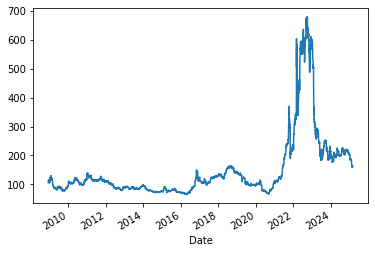

In [50]:
df['Coal'].plot()

# IDENTIFY SPIKES

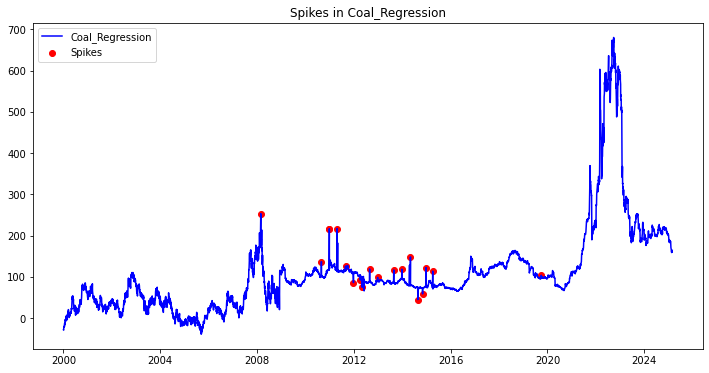

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


window = 30  # change
rolling_mean = df['Coal_Regression'].rolling(window=window, center=True).mean()
rolling_std = df['Coal_Regression'].rolling(window=window, center=True).std()

threshold = 3  # threshold for sensitivity
df['Is_Spike'] = np.abs(df['Coal_Regression'] - rolling_mean) > (threshold * rolling_std)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Coal_Regression'], label='Coal_Regression', color='blue')
plt.scatter(df.index[df['Is_Spike']], df['Coal_Regression'][df['Is_Spike']], color='red', label='Spikes')
plt.title('Spikes in Coal_Regression')
plt.legend()
plt.show()

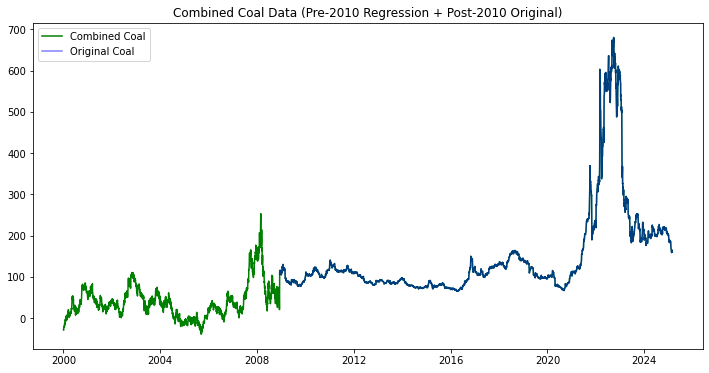

In [52]:
df['Coal_Combined'] = df['Coal'].copy()  # Start with original data
df.loc[df.index < '2010-01-01', 'Coal_Combined'] = df['Coal_Regression']  # regression for pre-2010

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Coal_Combined'], label='Combined Coal', color='green')
plt.plot(df.index, df['Coal'], label='Original Coal', color='blue', alpha=0.5)
plt.title('Combined Coal Data (Pre-2010 Regression + Post-2010 Original)')
plt.legend()
plt.show()

In [46]:
df

,Cattle,Cotton,Sugar,Coal,Wheat,Coal_Regression,Is_Spike,Coal_Combined
Date,,,,,,,,
2000-01-03,1.033592,0.738258,0.094239,NaN,3.457972,-28.591880,False,-28.591880
2000-01-04,1.038485,0.736561,0.089188,NaN,3.474343,-29.036474,False,-29.036474
2000-01-05,1.032964,0.732645,0.089017,NaN,3.486252,-29.242952,False,-29.242952
2000-01-06,1.048042,0.758568,0.090575,NaN,3.480722,-26.029319,False,-26.029319
2000-01-07,1.046121,0.785889,0.089340,NaN,3.504887,-22.516644,False,-22.516644
...,...,...,...,...,...,...,...,...
2025-02-21,3.131393,1.028167,0.335327,160.503541,9.402046,160.503541,False,160.503541
2025-02-24,3.134846,1.037807,0.331443,161.074354,9.239130,161.074354,False,161.074354
2025-02-25,3.137317,1.030585,0.337064,160.807189,9.124231,160.807189,False,160.807189


In [48]:
df.to_csv(r"E:\Australia_GDP_Cleaning\Commodities\AGRICULTURE_COMMODOTIES_Interpolated.csv")